In [1]:
import pandas as pd

In [4]:


tran = pd.read_excel("QVI_transaction_data.xlsx")

In [10]:
pur = pd.read_csv("QVI_purchase_behaviour.csv")

In [ ]:
## examine data and its basic characteristics

In [11]:
tran.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [12]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [13]:
tran.shape

(264836, 8)

In [14]:
tran.isnull().count()

DATE              264836
STORE_NBR         264836
LYLTY_CARD_NBR    264836
TXN_ID            264836
PROD_NBR          264836
PROD_NAME         264836
PROD_QTY          264836
TOT_SALES         264836
dtype: int64

In [15]:
tran.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [123]:
# The data is clean

In [ ]:
## examone the customer profiles and trends

In [17]:
pur.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [18]:
pur.shape

(72637, 3)

In [19]:
pur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [21]:
pur.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [ ]:
# Let's categorize  the customers by lifestage and prremium 

In [23]:
pur.groupby("LIFESTAGE")["PREMIUM_CUSTOMER"].count()

LIFESTAGE
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
OLDER FAMILIES             9780
OLDER SINGLES/COUPLES     14609
RETIREES                  14805
YOUNG FAMILIES             9178
YOUNG SINGLES/COUPLES     14441
Name: PREMIUM_CUSTOMER, dtype: int64

In [25]:
pur.groupby("PREMIUM_CUSTOMER")["PREMIUM_CUSTOMER"].count()

PREMIUM_CUSTOMER
Budget        24470
Mainstream    29245
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [31]:
pur1=pur[pur["PREMIUM_CUSTOMER"]=="Premium"]

In [33]:
pur1.groupby("LIFESTAGE")["LIFESTAGE"].count().sort_values(ascending=False)

LIFESTAGE
OLDER SINGLES/COUPLES     4750
RETIREES                  3872
YOUNG SINGLES/COUPLES     2574
YOUNG FAMILIES            2433
MIDAGE SINGLES/COUPLES    2431
OLDER FAMILIES            2274
NEW FAMILIES               588
Name: LIFESTAGE, dtype: int64

In [34]:
pur2=pur[pur["PREMIUM_CUSTOMER"]=="Mainstream"]

pur2.groupby("LIFESTAGE")["LIFESTAGE"].count().sort_values(ascending=False)

LIFESTAGE
YOUNG SINGLES/COUPLES     8088
RETIREES                  6479
OLDER SINGLES/COUPLES     4930
MIDAGE SINGLES/COUPLES    3340
OLDER FAMILIES            2831
YOUNG FAMILIES            2728
NEW FAMILIES               849
Name: LIFESTAGE, dtype: int64

In [35]:
pur3=pur[pur["PREMIUM_CUSTOMER"]=="Budget"]

pur3.groupby("LIFESTAGE")["LIFESTAGE"].count().sort_values(ascending=False)

LIFESTAGE
OLDER SINGLES/COUPLES     4929
OLDER FAMILIES            4675
RETIREES                  4454
YOUNG FAMILIES            4017
YOUNG SINGLES/COUPLES     3779
MIDAGE SINGLES/COUPLES    1504
NEW FAMILIES              1112
Name: LIFESTAGE, dtype: int64

In [ ]:
# Do a scatterplot to find outliers

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# merge data frames over loyalty card number

In [44]:
data = pd.merge(pur, tran, on ="LYLTY_CARD_NBR", how='inner')

In [46]:
data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [ ]:
# examine the entire merged dataset 

In [47]:
# find total sale of each product number

In [50]:
data.groupby("PROD_NBR")["PROD_QTY"].sum().sort_values(ascending=False)

PROD_NBR
4      6509
102    6381
108    6309
75     6277
33     6256
       ... 
11     2702
76     2700
98     2682
72     2666
29     2643
Name: PROD_QTY, Length: 114, dtype: int64

In [51]:
data.groupby("PROD_NBR")["TOT_SALES"].sum().sort_values(ascending=False)


PROD_NBR
4      40352.0
14     36367.6
16     34804.2
102    34457.4
7      34302.6
        ...   
92      4702.2
95      4600.2
72      4532.2
35      4234.5
76      4050.0
Name: TOT_SALES, Length: 114, dtype: float64

In [ ]:
# product 4 and product 102 seem to be selling very well quantity=wise and revenue-wise

In [52]:
## We now look at the products in detail.  We add two more columns, brand name and weight

In [55]:
data["wight_g"]= data["PROD_NAME"].str.extract('(\d+)').astype(int)

In [56]:
data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,wight_g
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9,160


In [57]:
# let's fix the date column


In [64]:
data["date"] = pd.to_datetime(data["DATE"])
data["date"]=data["date"].dt.date
data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,wight_g,date
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,1970-01-01
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,1970-01-01
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,1970-01-01
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,1970-01-01
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,1970-01-01


In [ ]:
# Let's reorganize the big file by cleaning up and making data clearer

In [ ]:
# Let's order the data according to date

In [126]:
data.sort_values(by ="date", ascending = False)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,wight_g,date,brand
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,1970-01-01,Natural Chips Cmpny Chips Cmpny
176578,179146,OLDER SINGLES/COUPLES,Mainstream,43508,179,180223,48,Red Rock Deli Sp Salt & Truffle 150G,2,5.4,150,1970-01-01,Red Rock Deli
176548,179142,YOUNG FAMILIES,Mainstream,43513,179,180190,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4,330,1970-01-01,Smiths
176549,179142,YOUNG FAMILIES,Mainstream,43626,179,180193,23,Cheezels Cheese 330g,2,11.4,330,1970-01-01,Cheezels
176550,179143,YOUNG FAMILIES,Mainstream,43323,179,180194,105,Woolworths Cheese Rings 190g,2,3.6,190,1970-01-01,Woolworths
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88284,91259,OLDER FAMILIES,Budget,43288,91,90155,32,Kettle Sea Salt And Vinegar 175g,2,10.8,175,1970-01-01,Kettle
88285,91259,OLDER FAMILIES,Budget,43314,91,90156,25,Pringles SourCream Onion 134g,2,7.4,134,1970-01-01,Pringles
88286,91259,OLDER FAMILIES,Budget,43479,91,90157,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,1970-01-01,Old
88287,91259,OLDER FAMILIES,Budget,43486,91,90158,17,Kettle Sensations BBQ&Maple 150g,2,9.2,150,1970-01-01,Kettle


In [ ]:
#Let's get the first word of all prod names and find brands

In [65]:
data["brand"] = data["PROD_NAME"].str.split().str.get(0)

In [71]:
data.head(35)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,wight_g,date,brand
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,1970-01-01,Natural
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,1970-01-01,Red
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,1970-01-01,Grain
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,1970-01-01,Natural
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,1970-01-01,WW
5,1005,MIDAGE SINGLES/COUPLES,Mainstream,43462,1,6,86,Cheetos Puffs 165g,1,2.8,165,1970-01-01,Cheetos
6,1007,YOUNG SINGLES/COUPLES,Budget,43438,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,110,1970-01-01,Infuzions
7,1007,YOUNG SINGLES/COUPLES,Budget,43439,1,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,150,1970-01-01,RRD
8,1009,NEW FAMILIES,Premium,43424,1,9,20,Doritos Cheese Supreme 330g,1,5.7,330,1970-01-01,Doritos
9,1010,YOUNG SINGLES/COUPLES,Mainstream,43352,1,10,51,Doritos Mexicana 170g,2,8.8,170,1970-01-01,Doritos


In [67]:
data["brand"].unique()

array(['Natural', 'Red', 'Grain', 'WW', 'Cheetos', 'Infuzions', 'RRD',
       'Doritos', 'Old', 'GrnWves', 'Smiths', 'Kettle', 'CCs', 'Tostitos',
       'Cobs', 'Burger', 'Woolworths', 'Thins', 'Tyrrells', 'Smith',
       'Cheezels', 'Twisties', 'Sunbites', 'Snbts', 'Pringles', 'French',
       'Infzns', 'Dorito', 'NCC'], dtype=object)

In [68]:
# replace these with proper names

In [90]:
data["brand"]=data["brand"].str.replace("Natural", "Natural Chips Cmpny")
data["brand"]=data["brand"].str.replace("Red", "Red Rock Deli")
data["brand"]=data["brand"].str.replace("Grain", "Grain Waves")
data["brand"]=data["brand"].str.replace("WW", "WW Original")
data["brand"]=data["brand"].str.replace("Infzn","Infuzions")
data["brand"]=data["brand"].str.replace("Thin", "Thin Chips")
data["brand"]=data["brand"].str.replace("Grain", "Grain Waves")
data["brand"]=data["brand"].str.replace("French", "French Fries")


In [80]:
print(data[data["PROD_NAME"].str.startswith("French").argmax():])

        LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER   DATE  \
105               1097               RETIREES           Budget  43431   
106               1097               RETIREES           Budget  43489   
107               1097               RETIREES           Budget  43590   
108               1099  OLDER SINGLES/COUPLES          Premium  43383   
109               1099  OLDER SINGLES/COUPLES          Premium  43521   
...                ...                    ...              ...    ...   
264831         2370701         YOUNG FAMILIES       Mainstream  43442   
264832         2370751         YOUNG FAMILIES          Premium  43374   
264833         2370961         OLDER FAMILIES           Budget  43397   
264834         2370961         OLDER FAMILIES           Budget  43400   
264835         2373711  YOUNG SINGLES/COUPLES       Mainstream  43448   

        STORE_NBR  TXN_ID  PROD_NBR                                 PROD_NAME  \
105             1     111        29       

In [91]:
data["brand"].unique()

array(['Natural Chips Cmpny Chips Cmpny', 'Red Rock Deli',
       'Grain Waves Waves', 'WW Original', 'Cheetos', 'Infuzions', 'RRD',
       'Doritos', 'Old', 'GrnWves', 'Smiths', 'Kettle', 'CCs', 'Tostitos',
       'Cobs', 'Burger', 'Woolworths', 'Thin Chipss', 'Tyrrells', 'Smith',
       'Cheezels', 'Twisties', 'Sunbites', 'Snbts', 'Pringles',
       'French Fries', 'Infuzionss', 'Dorito', 'NCC'], dtype=object)

In [92]:
data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,wight_g,date,brand
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,1970-01-01,Natural Chips Cmpny Chips Cmpny
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,1970-01-01,Red Rock Deli
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,1970-01-01,Grain Waves Waves
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,1970-01-01,Natural Chips Cmpny Chips Cmpny
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,1970-01-01,WW Original


In [ ]:
# group by brand

In [95]:
data.groupby("brand")["TOT_SALES"].sum().sort_values(ascending = False)

brand
Kettle                             390239.8
Smiths                             210076.8
Doritos                            201538.9
Pringles                           177655.5
Old                                 90785.1
Thin Chipss                         88852.5
Twisties                            81522.1
Tostitos                            79789.6
Infuzions                           76247.6
Cobs                                70569.8
RRD                                 64954.5
Tyrrells                            51647.4
Grain Waves Waves                   43048.8
Dorito                              40352.0
Cheezels                            40029.9
WW Original                         35889.5
Natural Chips Cmpny Chips Cmpny     34272.0
Red Rock Deli                       30091.5
Infuzionss                          22800.0
CCs                                 18078.9
Cheetos                             16884.5
Smith                               14583.4
Woolworths                

In [97]:
data["brand"]=data["brand"].str.replace("Snbts", "Sunbites")

In [ ]:
# remove old salsa and burger from list

In [116]:
data_chips = data[~data["PROD_NAME"].str.contains("Salsa")]
data_chips = data[~data["PROD_NAME"].str.contains("salsa")]
data_chips = data[~data["PROD_NAME"].str.contains("Burger")]


In [118]:
data_chips["brand"].unique()

array(['Natural Chips Cmpny Chips Cmpny', 'Red Rock Deli',
       'Grain Waves Waves', 'WW Original', 'Cheetos', 'Infuzions', 'RRD',
       'Doritos', 'Old', 'GrnWves', 'Smiths', 'Kettle', 'CCs', 'Tostitos',
       'Cobs', 'Woolworths', 'Thin Chipss', 'Tyrrells', 'Smith',
       'Cheezels', 'Twisties', 'Sunbites', 'Pringles', 'French Fries',
       'Infuzionss', 'Dorito', 'NCC'], dtype=object)

In [115]:
data_chips.describe

<bound method NDFrame.describe of         LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER   DATE  \
0                 1000  YOUNG SINGLES/COUPLES          Premium  43390   
1                 1002  YOUNG SINGLES/COUPLES       Mainstream  43359   
2                 1003         YOUNG FAMILIES           Budget  43531   
3                 1003         YOUNG FAMILIES           Budget  43532   
4                 1004  OLDER SINGLES/COUPLES       Mainstream  43406   
...                ...                    ...              ...    ...   
264831         2370701         YOUNG FAMILIES       Mainstream  43442   
264832         2370751         YOUNG FAMILIES          Premium  43374   
264833         2370961         OLDER FAMILIES           Budget  43397   
264834         2370961         OLDER FAMILIES           Budget  43400   
264835         2373711  YOUNG SINGLES/COUPLES       Mainstream  43448   

        STORE_NBR  TXN_ID  PROD_NBR                                 PROD_NAME  \
0       

(array([  4515.,  23841.,  74460., 106133.,  10745.,      0.,   6285.,
         15166.,  12540.,   6418.]),
 array([ 70., 101., 132., 163., 194., 225., 256., 287., 318., 349., 380.]),
 <BarContainer object of 10 artists>)

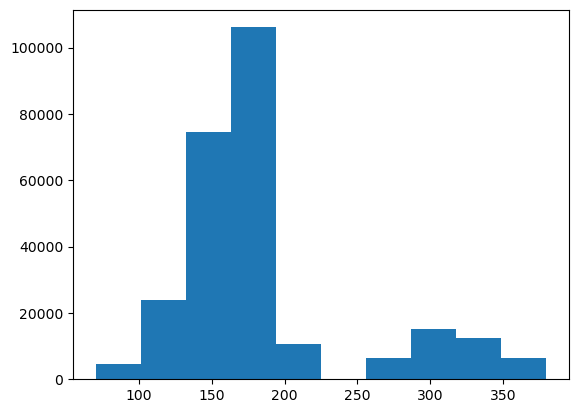

In [119]:
plt.hist(data_chips["wight_g"])

(array([35751., 42833.,     0., 53519.,     0., 24676.,  6802.,     0.,
        47680., 48842.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

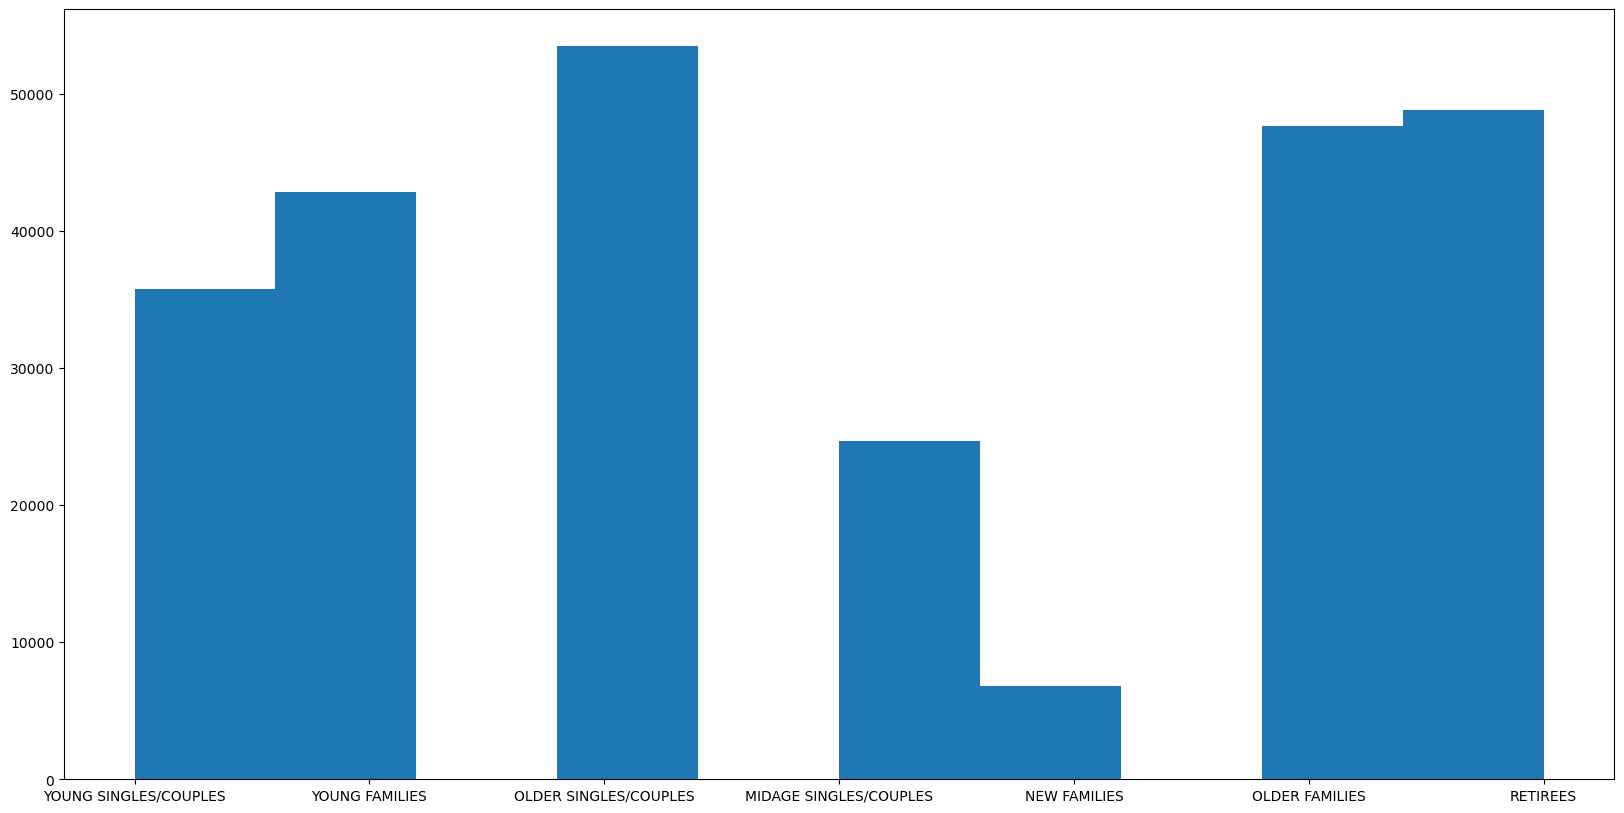

In [120]:


plt.figure(figsize=(20,10))
plt.hist(data_chips["LIFESTAGE"])

(array([ 68423.,      0.,      0.,      0.,      0., 100198.,      0.,
             0.,      0.,  91482.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

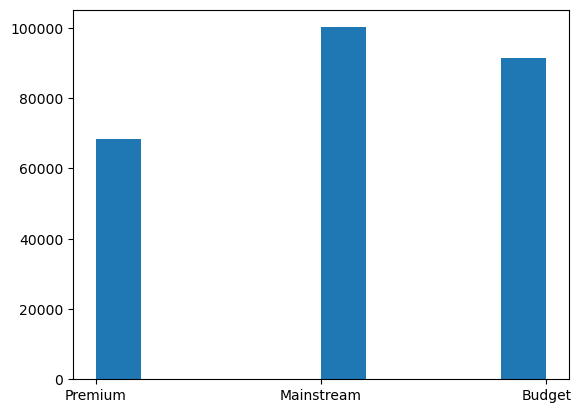

In [121]:
plt.hist(data_chips["PREMIUM_CUSTOMER"])

In [109]:
#Lets do something complex using lifestage and premium

# Let's graph which types of people spend most on chips

<Axes: xlabel='LIFESTAGE'>

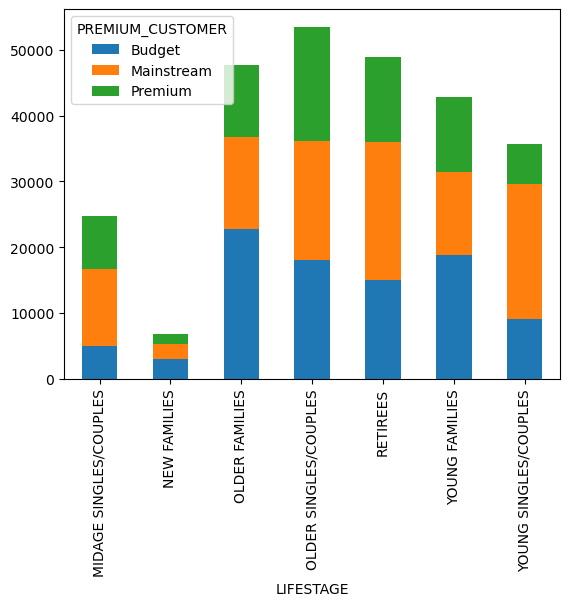

In [122]:
cat_field = data_chips["LIFESTAGE"]
sub_field=data_chips["PREMIUM_CUSTOMER"]
# make a cross table
histdat = pd.crosstab(cat_field, sub_field)

histdat.plot(kind="bar", stacked = True)

In [127]:
## find mean and std for basic stats

data_chips.head(2)


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,wight_g,date,brand
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,1970-01-01,Natural Chips Cmpny Chips Cmpny
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,1970-01-01,Red Rock Deli


In [128]:
data["TOT_SALES"].mean()

7.304199580117505

In [129]:
data["TOT_SALES"].std()

3.0832257462333983

In [132]:
data_chips["TOT_SALES"].max()

650.0

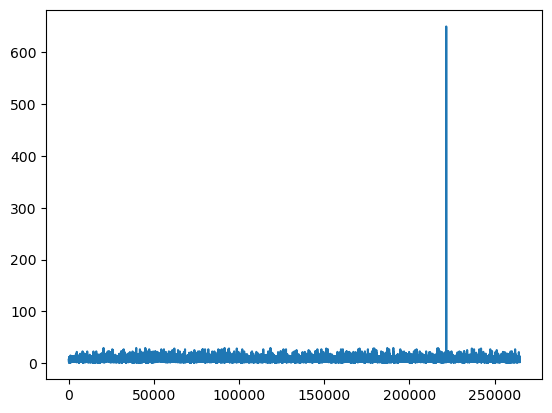

In [133]:
plt.plot(data_chips["TOT_SALES"])

In [ ]:
# we see that there is a single sale of 600 packs and the rest of the data is far below 100
# we remove that outlier data


In [137]:
data_chips_new=data_chips[~(data_chips["TOT_SALES"]>100)]

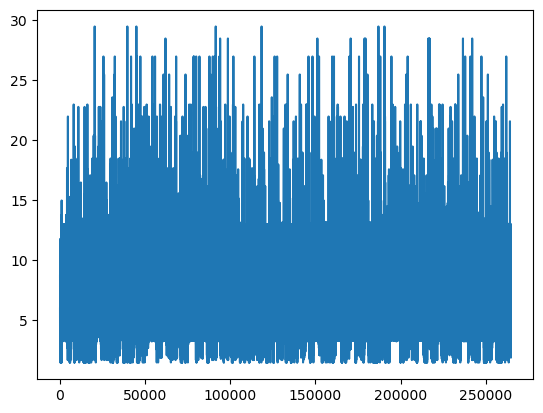

In [138]:
plt.plot(data_chips_new["TOT_SALES"])

In [139]:
data_chips_new["TOT_SALES"].mean()

7.30557475749805

In [140]:
data_chips_new["TOT_SALES"].std()

2.5319243460821337

In [ ]:
# we see that the std has gone down significantly after removing the outlier

In [ ]:
# We now analyze the trend of sales in stores

In [141]:
data_chips_new["STORE_NBR"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86, 155,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [143]:
data_chips_new["STORE_NBR"].count()

260101

In [ ]:
# we will aggregate total sales for the 272 stores.  Many of them appear multiple
# times and so we will group by stores and aggregate by total sales

In [147]:
stores = data_chips_new.groupby("STORE_NBR")["TOT_SALES"].sum().sort_values(ascending = False)

In [148]:
print(stores)

STORE_NBR
226    17317.35
88     16101.05
165    15754.45
40     15383.20
237    15264.30
         ...   
206        7.60
252        7.40
11         6.70
76         6.00
211        5.20
Name: TOT_SALES, Length: 272, dtype: float64


In [ ]:
# We see that while some stores sell a lot of chips, some barely sell chips.
# Hencce, it might be interesting to stock chips accordingly